In [ ]:
import numpy as np

from geometric_sampling.search.astar import AStarFast
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT

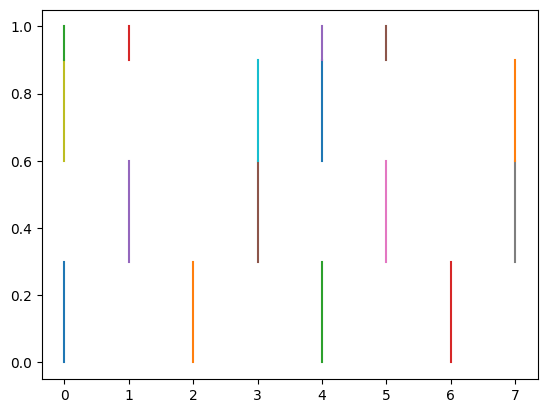

In [2]:
inclusions = [0.7, 0.4, 0.3, 0.6] * 2
d = Design(inclusions)
d.show()

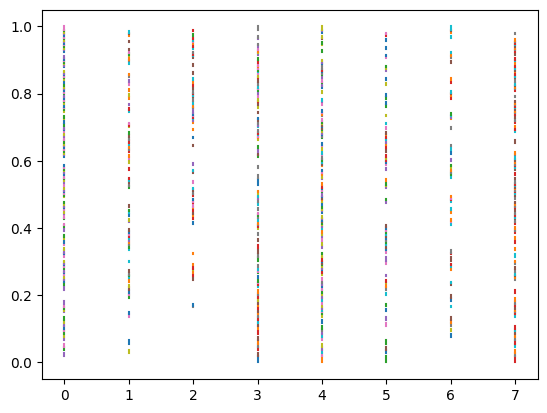

In [3]:
dd = AStarFast.iterate_design(d, 100)
dd.show()

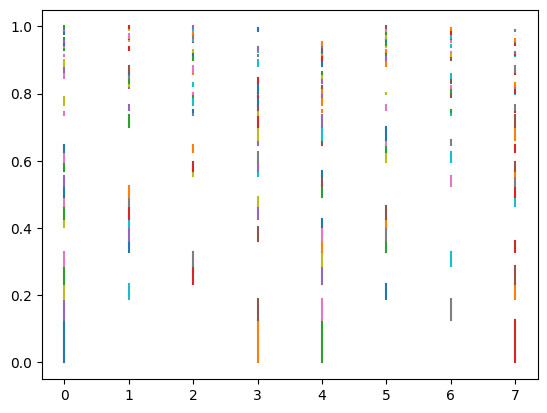

In [4]:
dd.merge_identical()
dd.show()

In [5]:
rng = np.random.default_rng()
x = rng.random(len(inclusions))
a = AStarFast(VarNHT(x, np.array(inclusions)))

print(a.best_criteria_value)

0.7674204572763025


In [6]:
a.run(1000, 10, 100, 1)

1000

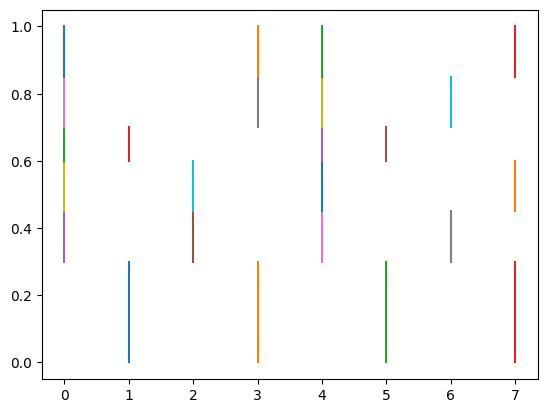

0.5058290631903501


In [7]:
a.best_design.show()
print(a.best_criteria_value)

---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geometric_sampling as gs
import numpy as np

In [6]:
rng = np.random.default_rng()
N = 50
x = rng.random(size=N)
n = 5
inclusion = rng.random(N)
inclusion *= n / inclusion.sum()

In [7]:
initial_design = gs.Design(inclusion)
nht = gs.criteria.VarNHT(x, inclusion)
astar = gs.search.AStar(initial_design, nht, switch_coefficient=1)

In [ ]:
probs = [sample.probability for sample in design]
sample_ids = [list(sample.ids) for sample in design]
rng.choice(sample_ids, size=5, p=probs)

array([[ 0, 32, 20, 43, 12],
       [ 1, 35, 22, 44, 14],
       [ 2, 37, 25, 45, 15],
       [ 0, 32, 20, 43, 12],
       [ 4, 37, 26, 46, 15]])

149.85538902522603


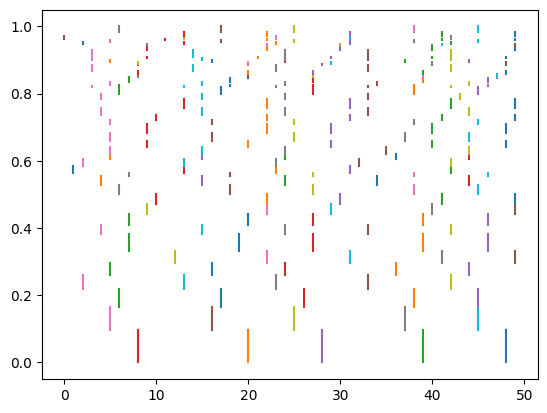

In [44]:
print(astar.initial_criteria_value)
astar.initial_design.show()

In [42]:
astar.run(2000, 10, 10000, 1)

2000

147.89166040276632


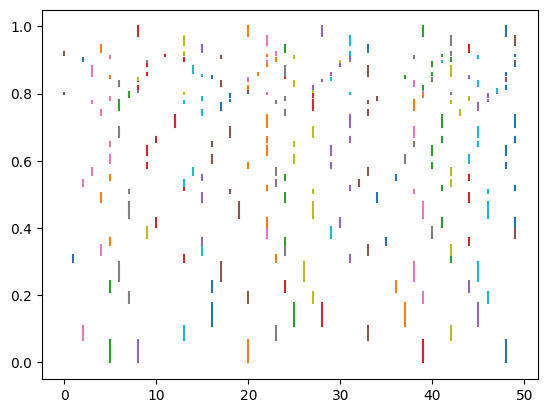

In [45]:
print(astar.best_criteria_value)
astar.best_design.show()

---

# Shatranj

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geometric_sampling as gs
import numpy as np

In [5]:
rng = np.random.default_rng()
N = 100
n = 4
coords = rng.random((N, 2))
probs = rng.random(N)
probs *= n/probs.sum()

In [25]:
kss = gs.method.KMeansSpatialSampling(
    coords,
    probs,
    n=n,
    n_zones=(2, 2),
    tolerance=5
)

In [33]:
samples = kss.sample(100)

In [9]:
pop = gs.method.Population(
    coords,
    probs,
    n_clusters=n,
    n_zones=(2, 2),
    tolerance=5
)

[array([[2.50000000e+01, 5.02346488e-01, 7.59589083e-01, 3.55200000e-02],
       [9.40000000e+01, 5.03320825e-01, 7.49198255e-01, 1.58600000e-02],
       [9.60000000e+01, 5.45783482e-01, 6.11308859e-01, 6.89453955e-02],
       [1.90000000e+01, 5.52763640e-01, 6.72616747e-01, 1.51176858e-02],
       [7.80000000e+01, 5.67330541e-01, 6.88301849e-01, 5.72505111e-02],
       [5.60000000e+01, 5.74778461e-01, 9.62493385e-01, 4.21958034e-02],
       [3.20000000e+01, 5.77973453e-01, 9.67113093e-01, 8.46422015e-03],
       [1.70000000e+01, 6.39268662e-01, 7.25990109e-01, 3.59403408e-02],
       [8.10000000e+01, 6.46859021e-01, 6.01874985e-01, 1.74343607e-02],
       [8.40000000e+01, 6.76380448e-01, 7.84324070e-01, 7.40250893e-02],
       [6.20000000e+01, 6.79279020e-01, 6.32290212e-01, 2.20120698e-02],
       [2.40000000e+01, 6.89707859e-01, 7.75774859e-01, 5.35517470e-02],
       [3.30000000e+01, 7.68320949e-01, 6.92796274e-01, 3.88174088e-02],
       [8.00000000e+00, 7.82992740e-01, 9.39679542

In [17]:
pop.clusters[0].zones[1].units

array([[1.70000000e+01, 6.39268662e-01, 7.25990109e-01, 5.52000000e-03],
       [9.40000000e+01, 5.03320825e-01, 7.49198255e-01, 1.58600000e-02],
       [2.50000000e+01, 5.02346488e-01, 7.59589083e-01, 3.55200000e-02],
       [2.40000000e+01, 6.89707859e-01, 7.75774859e-01, 5.35517470e-02],
       [8.40000000e+01, 6.76380448e-01, 7.84324070e-01, 7.40250893e-02],
       [8.00000000e+00, 7.82992740e-01, 9.39679542e-01, 1.48700000e-02],
       [5.60000000e+01, 5.74778461e-01, 9.62493385e-01, 4.21958034e-02],
       [3.20000000e+01, 5.77973453e-01, 9.67113093e-01, 8.46000000e-03]])

In [7]:
for cluster in pop.clusters:
    for zone in cluster.zones:
        print(round(zone.units[:, 3].sum(), 4))

0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25


In [50]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull
import numpy as np


# Helper function to compute the convex hull and plot it
def plot_convex_hull(points, ax, color, alpha=0.3, edge_color='black', line_width=1.0):
    if len(points) < 3:
        # Convex hull requires at least 3 points
        return
    hull = ConvexHull(points)
    polygon = Polygon(points[hull.vertices], closed=True, facecolor=color, alpha=alpha, edgecolor=edge_color, lw=line_width)
    ax.add_patch(polygon)
    return hull

# Plotting function
def plot_clusters_and_zones(clusters, sample=None):
    fig, ax = plt.subplots(figsize=(10, 8))

    for cluster_idx, cluster in enumerate(clusters):
        # Extract coordinates for the cluster
        cluster_points = cluster.units[:, 1:3]  # x, y coordinates
        cluster_color = plt.cm.tab10(cluster_idx % 10)  # Cycle through colors

        # Plot convex hull for the cluster
        plot_convex_hull(cluster_points, ax, color=cluster_color, alpha=0.2)

        # Plot scatter points for the cluster
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=cluster_color, label=f'Cluster {cluster_idx+1}', alpha=0.8)

        # Plot zones within the cluster
        for zone_idx, zone in enumerate(cluster.zones):
            zone_points = zone.units[:, 1:3]  # x, y coordinates
            zone_color = cluster_color  # Same color as the cluster but slightly lighter
            plot_convex_hull(zone_points, ax, color=zone_color, alpha=0.4, edge_color='gray', line_width=0.8)

            # Compute the centroid of the zone's convex hull
            if len(zone_points) >= 3:
                hull = ConvexHull(zone_points)
                hull_center = np.mean(zone_points[hull.vertices], axis=0)
            else:
                hull_center = np.mean(zone_points, axis=0)

            # Plot zone index at the centroid
            ax.text(hull_center[0], hull_center[1], f'{zone_idx+1}', color='black', fontsize=16, alpha=0.3,
                    ha='center', va='center', weight='bold')

    if sample is not None:
        ax.scatter(sample[:, 0], sample[:, 1], color='black', label='Sample Points', s=100, marker='X')

    ax.set_title("Clusters and Zones with Convex Hulls")
    # ax.legend()
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    plt.show()

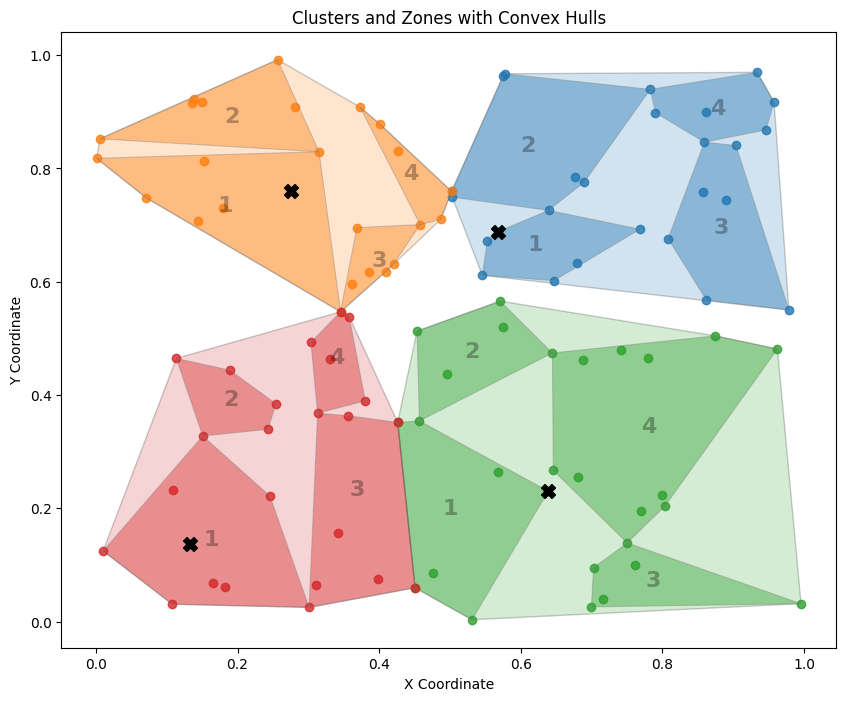

In [52]:
plot_clusters_and_zones(pop.clusters, coords[samples[0]])

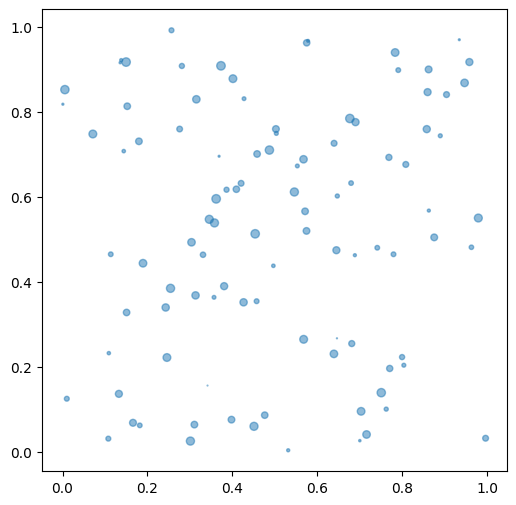

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(coords[:, 0], coords[:, 1], s=probs*500, alpha=0.5)

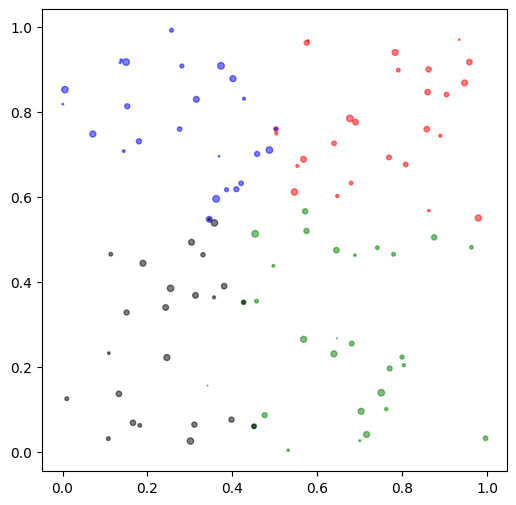

In [14]:
plt.figure(figsize=(6, 6))
color = ['red', 'blue', 'green', 'black']
for i, cluster in enumerate(pop.clusters):
    plt.scatter(cluster.units[:, 1], cluster.units[:, 2], c=color[i], s=cluster.units[:, 3]*300, alpha=0.5)

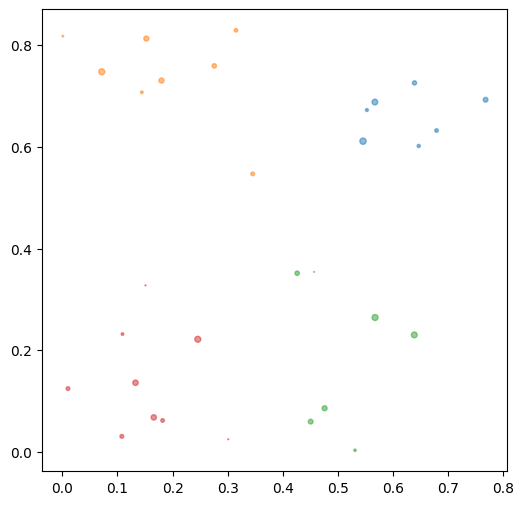

In [18]:
plt.figure(figsize=(6, 6))
for cluster in pop.clusters:
    plt.scatter(cluster.zones[0].units[:, 1], cluster.zones[0].units[:, 2], s=cluster.zones[0].units[:, 3]*300, alpha=0.5)

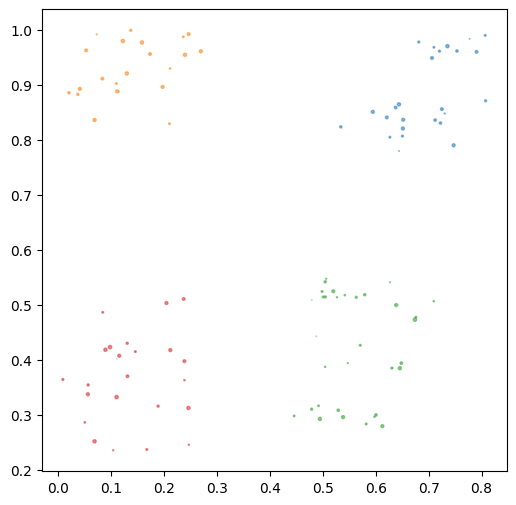

In [22]:
plt.figure(figsize=(6, 6))
for cluster in pop.clusters:
    i = 1
    plt.scatter(cluster.zones[i].units[:, 1], cluster.zones[i].units[:, 2], s=cluster.zones[i].units[:, 3]*300, alpha=0.5)

In [24]:
t = 0
for region in pop.regions:
    t += np.sum(region[:, 3])
    print(np.sum(region[:, 3]), round(np.sum(region[:, 3]), 9), np.abs(1/n_of_zones-np.sum(region[:, 3])), np.abs(1/n_of_zones-np.sum(region[:, 3]))<10**-9)
print(t, round(t, 9), n-t, n-t<10**-9)

NameError: name 'pop' is not defined

In [40]:
def simulate(k, tolerence):
    num_of_subregion_true = 0
    num_of_sum_true = 0
    num_of_all_true = 0
    for i in range(1, k+1):
        subregion_true = 1
        sum_true = 1

        rng = np.random.default_rng()
        N = 100
        n = 10
        coords = rng.random((N, 2))
        probs = rng.random(N)
        probs *= n/probs.sum()

        pop = gm.shatranj.Population(
            coords,
            probs,
            orientation='vertical',
            region_threshold=2,
            subregion_threshold=0.5,
            n_of_zones=4,
            tolerance=9
        )

        t = 0
        for region in pop.regions:
            t += np.sum(region[:, 3])
            if np.abs(2-np.sum(region[:, 3]))>=10**-tolerence:
                subregion_true = 0
        if np.abs(n-t)>=10**-tolerence:
            sum_true = 0

        num_of_subregion_true += subregion_true
        num_of_sum_true += sum_true
        num_of_all_true += subregion_true*sum_true

        print(f"\rIteration: {k} - regions: {round(num_of_subregion_true/k, 2)} - sum: {round(num_of_sum_true/k, 2)} - all: {round(num_of_all_true/k, 2)}", end="", flush=True)
    print()
    print(f"Iteration: {k} - regions: {round(num_of_subregion_true/k, 2)} - sum: {round(num_of_sum_true/k, 2)} - all: {round(num_of_all_true/k, 2)}", end="", flush=True)

In [43]:
simulate(1000, 9)

Iteration: 1000 - regions: 0.81 - sum: 0.91 - all: 0.76
Iteration: 1000 - regions: 0.81 - sum: 0.91 - all: 0.76

In [45]:
coords2 = np.array([
    [0.1, 0.1],
    [0.2, 0.1],
    [0.3, 0.1],
    [0.4, 0.1],
    [0.5, 0.1],
    [0.6, 0.1],
    [0.7, 0.1],
    [0.8, 0.1],
])
probs2 = np.array([0.04, 0.04, 0.06, 0.06, 0.08, 0.37, 0.05, 0.1])
#                  0.04, 0.08, 0.14, 0.20, 0.28, 0.65, 0.70, 0.8
#                   1     2     3     4     5     6     7     8
#                   0     1     2     3     4     5     6     7

In [46]:
pop = gs.shatranj.Population(
        coords2,
        probs2,
        n_zones=4,
        tolerance=9
    )

In [47]:
pop.regions

[array([[1.  , 0.1 , 0.1 , 0.04],
        [2.  , 0.2 , 0.1 , 0.04],
        [3.  , 0.3 , 0.1 , 0.02]]),
 array([[3.  , 0.3 , 0.1 , 0.04],
        [4.  , 0.4 , 0.1 , 0.06]]),
 array([[5.  , 0.5 , 0.1 , 0.08],
        [6.  , 0.6 , 0.1 , 0.02]]),
 array([[6. , 0.6, 0.1, 0.1]]),
 array([[6. , 0.6, 0.1, 0.1]]),
 array([[6. , 0.6, 0.1, 0.1]]),
 array([[6.  , 0.6 , 0.1 , 0.05],
        [7.  , 0.7 , 0.1 , 0.05]]),
 array([[8. , 0.8, 0.1, 0.1]])]

In [3]:
coords2 = np.array([
    [0.1, 0.1],
    [0.1, 0.2],
    [0.1, 0.3],
    [0.1, 0.4],
    [0.2, 0.1],
    [0.2, 0.2],
    [0.2, 0.3],
    [0.2, 0.4],
    [0.3, 0.1],
    [0.3, 0.2],
    [0.3, 0.3],
    [0.3, 0.4],
])
probs2 = np.array([0.75]*12)

In [ ]:
pop2 = gm.shatranj.Population(
    coords2,
    probs2,
    orientation='vertical',
    region_threshold=3,
    subregion_threshold=0.5,
    n_of_zones=4,
    tolerance=9
)

In [10]:
pop2.regions

[array([[1.  , 0.1 , 0.1 , 0.75],
        [2.  , 0.1 , 0.2 , 0.75],
        [3.  , 0.1 , 0.3 , 0.75],
        [4.  , 0.1 , 0.4 , 0.75]]),
 array([[5.  , 0.2 , 0.1 , 0.75],
        [6.  , 0.2 , 0.2 , 0.75],
        [7.  , 0.2 , 0.3 , 0.75],
        [8.  , 0.2 , 0.4 , 0.75]]),
 array([[ 9.  ,  0.3 ,  0.1 ,  0.75],
        [10.  ,  0.3 ,  0.2 ,  0.75],
        [11.  ,  0.3 ,  0.3 ,  0.75],
        [12.  ,  0.3 ,  0.4 ,  0.75]])]

In [11]:
pop2._generate_subregions()

[[array([[1. , 0.1, 0.1, 0.5]]),
  array([[1.  , 0.1 , 0.1 , 0.25],
         [1.  , 0.1 , 0.1 , 0.75]]),
  array([[2.  , 0.1 , 0.2 , 1.25]]),
  array([[3. , 0.1, 0.3, 1.5]]),
  array([[3.  , 0.1 , 0.3 , 1.75]]),
  array([[4. , 0.1, 0.4, 2. ]])],
 [array([[5. , 0.2, 0.1, 0.5]]),
  array([[5.  , 0.2 , 0.1 , 0.25],
         [5.  , 0.2 , 0.1 , 0.75]]),
  array([[6.  , 0.2 , 0.2 , 1.25]]),
  array([[7. , 0.2, 0.3, 1.5]]),
  array([[7.  , 0.2 , 0.3 , 1.75]]),
  array([[8. , 0.2, 0.4, 2. ]])],
 [array([[9. , 0.3, 0.1, 0.5]]),
  array([[9.  , 0.3 , 0.1 , 0.25],
         [9.  , 0.3 , 0.1 , 0.75]]),
  array([[10.  ,  0.3 ,  0.2 ,  1.25]]),
  array([[11. ,  0.3,  0.3,  1.5]]),
  array([[11.  ,  0.3 ,  0.3 ,  1.75]]),
  array([[12. ,  0.3,  0.4,  2. ]])]]

In [12]:
t = 0
for region in pop2.regions:
    t += np.sum(region[:, 3])
    print(np.sum(region[:, 3]), round(np.sum(region[:, 3]), 9), np.abs(2-np.sum(region[:, 3])), np.abs(2-np.sum(region[:, 3]))<10**-9)
print(t, round(t, 9))

3.0 3.0 1.0 False
3.0 3.0 1.0 False
3.0 3.0 1.0 False
9.0 9.0


In [41]:
t = 0
for region in pop2.subregions:
    for subregion in region:
        t += np.sum(subregion[:, 3])
        print(np.sum(subregion[:, 3]), round(np.sum(subregion[:, 3]), 9))
print(t, round(t, 9))

0.5 0.5
1.1 1.1
1.4 1.4
1.7 1.7
2.0 2.0
2.1 2.1
0.5 0.5
1.1 1.1
1.4 1.4
1.7 1.7
2.0 2.0
2.1 2.1
0.5 0.5
1.1 1.1
1.4 1.4
1.7 1.7
2.0 2.0
2.1 2.1
0.5 0.5
0.7 0.7
2.6 2.6
4.5 4.5
6.4 6.4
8.3 8.3
49.400000000000006 49.4


---
# KMeans

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy.typing import NDArray

import geometric_sampling as gs
import matplotlib.pyplot as plt

In [3]:
def generate_2d_grid_coordinates(N):
    grid_1d = np.linspace(0, 1, N)
    x, y = np.meshgrid(grid_1d, grid_1d)
    grid_coordinates = np.vstack([x.ravel(), y.ravel()]).T
    return grid_coordinates

In [4]:
def generate_random_coordinates(N, seed=None):
    rng = np.random.default_rng(seed)
    coordinates = rng.random((N, 2))
    return coordinates

In [5]:
def generate_equal_probabilities(N: int, n: int) -> NDArray:
    probabilities = np.full(N, n/N)
    return probabilities

In [6]:
def generate_unequal_probabilities(N: int, n: int, seed: int = None) -> NDArray:
    rng = np.random.default_rng(seed)
    probabilities = rng.random(N)
    probabilities *= n/probabilities.sum()
    return probabilities

In [7]:
N = 200
n = 10

coords = generate_random_coordinates(N)
probs = generate_unequal_probabilities(N, n)

# coords = generate_2d_grid_coordinates(N)
# probs = generate_equal_probabilities(N**2, n)

In [10]:
sbk = gs.clusters.SoftBalancedKMeans(k=n, tolerance=5)
sbk.fit(coords)

In [ ]:
sbk.balance(coords, probs)

[1.67526729 0.91860892 1.1501334  0.70072007 0.98106451 1.22552745
 0.77650709 0.53351866 1.11743845 0.92121416]
Transfering data point 22 with prob 0.01062 from cluster 2 to cluster 8
Transfering data point 142 with prob 0.05391 from cluster 4 to cluster 9
Transfering data point 110 with prob 0.06566 from cluster 4 to cluster 9
Transfering data point 171 with prob 0.06979 from cluster 3 to cluster 7
Transfering data point 30 with prob 0.0693 from cluster 8 to cluster 4
Transfering data point 170 with prob 0.02936 from cluster 3 to cluster 7
Transfering data point 167 with prob 0.05421 from cluster 5 to cluster 8
Transfering data point 135 with prob 0.04717 from cluster 2 to cluster 8
Transfering data point 103 with prob 0.03106 from cluster 8 to cluster 4
Transfering data point 101 with prob 0.09154 from cluster 4 to cluster 9
Transfering data point 154 with prob 0.04466 from cluster 8 to cluster 4
[1.67526729 0.91860892 1.13645844 0.61711586 1.04466047 1.1713148
 0.77650709 0.6171186

In [12]:
sbk.clusters_sum

array([0.99999934, 1.00000179, 0.99999694, 1.00000135, 0.99999723,
       1.00000197, 0.99999709, 0.99999866, 1.00000342, 1.00000416])

In [18]:
labels = np.zeros(N)
for i, point in enumerate(sbk.fractional_labels):
    label = np.nonzero(point)[0]
    if len(label) == 1:
        labels[i] = label[0]
    else:
        labels[i] = n

labels

array([ 0.,  8.,  9.,  4.,  1.,  5.,  3.,  9.,  5.,  7., 10.,  7.,  9.,
        7.,  6.,  3.,  7.,  4.,  0.,  3.,  6.,  8.,  8.,  8.,  3.,  4.,
        3.,  2.,  6.,  5.,  4.,  6.,  7., 10.,  4.,  4.,  1.,  4., 10.,
        9.,  3.,  4.,  1., 10.,  1.,  3.,  9.,  4.,  2.,  5.,  1.,  5.,
       10., 10.,  8.,  8.,  1.,  4.,  7.,  6., 10.,  0.,  0.,  0.,  2.,
        7.,  0.,  5.,  1.,  1.,  0.,  2.,  7.,  6., 10.,  0.,  3.,  2.,
        9.,  5.,  1., 10.,  6.,  6., 10.,  7.,  1., 10.,  3.,  0.,  1.,
        0.,  3.,  9.,  6., 10.,  2.,  1.,  7.,  7.,  5., 10.,  5.,  4.,
        8.,  2.,  2.,  8.,  9.,  6.,  9.,  2.,  1.,  6.,  9.,  6.,  5.,
        2.,  8.,  4.,  8.,  7., 10.,  9.,  7.,  1.,  2.,  0.,  0.,  9.,
        5.,  6.,  1., 10.,  5.,  8.,  3.,  7.,  7.,  6.,  8.,  9.,  6.,
        2.,  4.,  2.,  1.,  5.,  3.,  7.,  9.,  3.,  9.,  5.,  4.,  3.,
        3.,  2.,  9.,  0.,  2.,  2.,  3.,  9.,  2.,  4.,  0.,  8.,  2.,
        1.,  7.,  7.,  8.,  0., 10.,  9.,  3.,  5.,  1.,  7.,  0

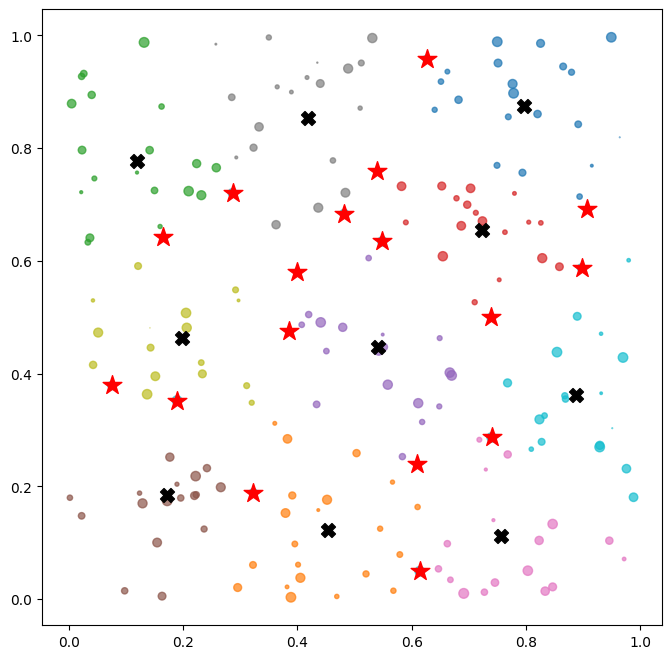

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab10', alpha=0.7, s=probs*500)
plt.scatter(sbk.centroids[:, 0], sbk.centroids[:, 1], c="black", marker="X", s=100)
plt.scatter(coords[:, 0][labels == n], coords[:, 1][labels == n], c="red", marker="*", s=200)

# for i, (x, y) in enumerate(coords):
#     plt.text(x, y, str(i), fontsize=9, ha='center', va='bottom')

# for i, (cx, cy) in enumerate(sbk.centroids):
#     plt.text(cx, cy, str(i), fontsize=12, ha='center', va='bottom', color='blue', weight='bold')

In [16]:
a = np.array([
    [0, 1, 0],
    [1, 3, 0],
    [0, 0, 1]
])

b = np.nonzero(a)

a[b]

array([1, 1, 3, 1])

---

In [19]:
import geometric_sampling as gs
import matplotlib.pyplot as plt
import numpy as np

In [20]:
rng = gs.random.rng()

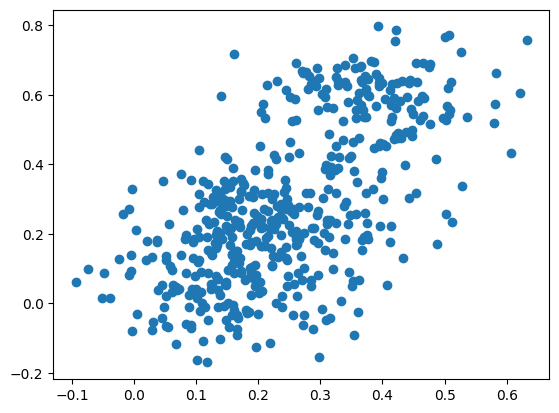

In [42]:
coords = rng.cluster_coordinates(4, 0.09, size=(500, 2))
plt.scatter(coords[:, 0], coords[:, 1])

In [48]:
rng.random_coordinates((2, 10, 2))

array([[[0.92671219, 0.38264864],
        [0.97661039, 0.92742004],
        [0.71401297, 0.1567355 ],
        [0.92992116, 0.56040189],
        [0.90577876, 0.15127831],
        [0.35197408, 0.67002594],
        [0.06967968, 0.08010806],
        [0.48120841, 0.14998633],
        [0.28279307, 0.55566792],
        [0.29321535, 0.68674484]],

       [[0.23902583, 0.05501409],
        [0.88598935, 0.50665238],
        [0.88130442, 0.1990426 ],
        [0.14226936, 0.77990724],
        [0.35670085, 0.0584571 ],
        [0.65641767, 0.99497645],
        [0.91505732, 0.50282189],
        [0.83038591, 0.63200479],
        [0.44137718, 0.68963586],
        [0.54546031, 0.31752096]]])

In [51]:
np.all(np.abs(np.array([1, 1, 1]) - 1) < 10**-9)

np.True_